Lucas de Souza Ferreira - 32077548<br>
Larissa Said Rocha - 32084341


# Análise Climática e de Qualidade do Ar
Este notebook contém análises e modelagens de dados climáticos, seguindo a metodologia CRISP-DM.

In [1]:
## Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


## Entendimento do Negócio
**Objetivo:** Compreender padrões climáticos e de qualidade do ar em diversas localidades.<br>
**Aplicações:** Estudos ambientais, planejamento urbano, saúde pública.<br>
**Abordagem:** Realizar análises descritivas e preditivas para extrair insights relevantes dos dados.


## Entendimento dos Dados
**Dataset:** "GlobalWeatherRepository.csv", contendo dados sobre temperatura, qualidade do ar, condições climáticas, informações astronômicas.<br>
**Inspeção Inicial:** Carga dos dados e visualização das primeiras linhas para entender sua estrutura.

In [2]:
#Carregar dados
data = pd.read_csv('GlobalWeatherRepository.csv')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93



## Pré-processamento

**Limpeza e preparação dos dados**

**Preparação para Modelagem**

In [3]:
# Converter colunas de data/hora e extrair informações relevantes
data['last_updated'] = pd.to_datetime(data['last_updated'])
data['month'] = data['last_updated'].dt.month
data['hour'] = data['last_updated'].dt.hour

# Seleção de características para modelagem
features = data[['latitude', 'longitude', 'month', 'hour']]
target = data['temperature_celsius']

# Escalonamento dos dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Preparação para Análise Descritiva**

In [4]:
# Análises 1 a 3
temp_pais = data.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)
temp_mensal = data.groupby('month')['temperature_celsius'].mean()
qualidade_ar_localidade = data.groupby('location_name')['air_quality_PM2.5'].mean().sort_values(ascending=False)

# Análises 4 a 6
variabilidade_temp_pais = data.groupby('country')['temperature_celsius'].std().sort_values(ascending=False)
correlacao_temp_qualidade_ar = data[['temperature_celsius', 'air_quality_PM2.5']].corr()
distribuicao_qualidade_ar = data['air_quality_PM2.5']

# Análises 7 a 9
pais_temp_menor = data.groupby('country')['temperature_celsius'].mean().sort_values()
indice_qualidade_ar_pais = data.groupby('country')['air_quality_us-epa-index'].mean().sort_values()
temp_hora = data.groupby('hour')['temperature_celsius'].mean()


## Modelagem
Criação e treinamento do modelo de previsão de temperatura.<br>
**Modelo Escolhido:** Random Forest para prever a temperatura.<br>
**Treinamento e Teste:** Divisão dos dados e treinamento do modelo.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Treinamento do modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.5188387562791235


## Avaliação dos Resultados
**Desempenho do Modelo:** Avaliação do modelo com RMSE de 2.52°C.<br>
**Análises Descritivas:** Exploração de padrões de temperatura e Variabilidade, variações sazonais e diárias, qualidade do ar.


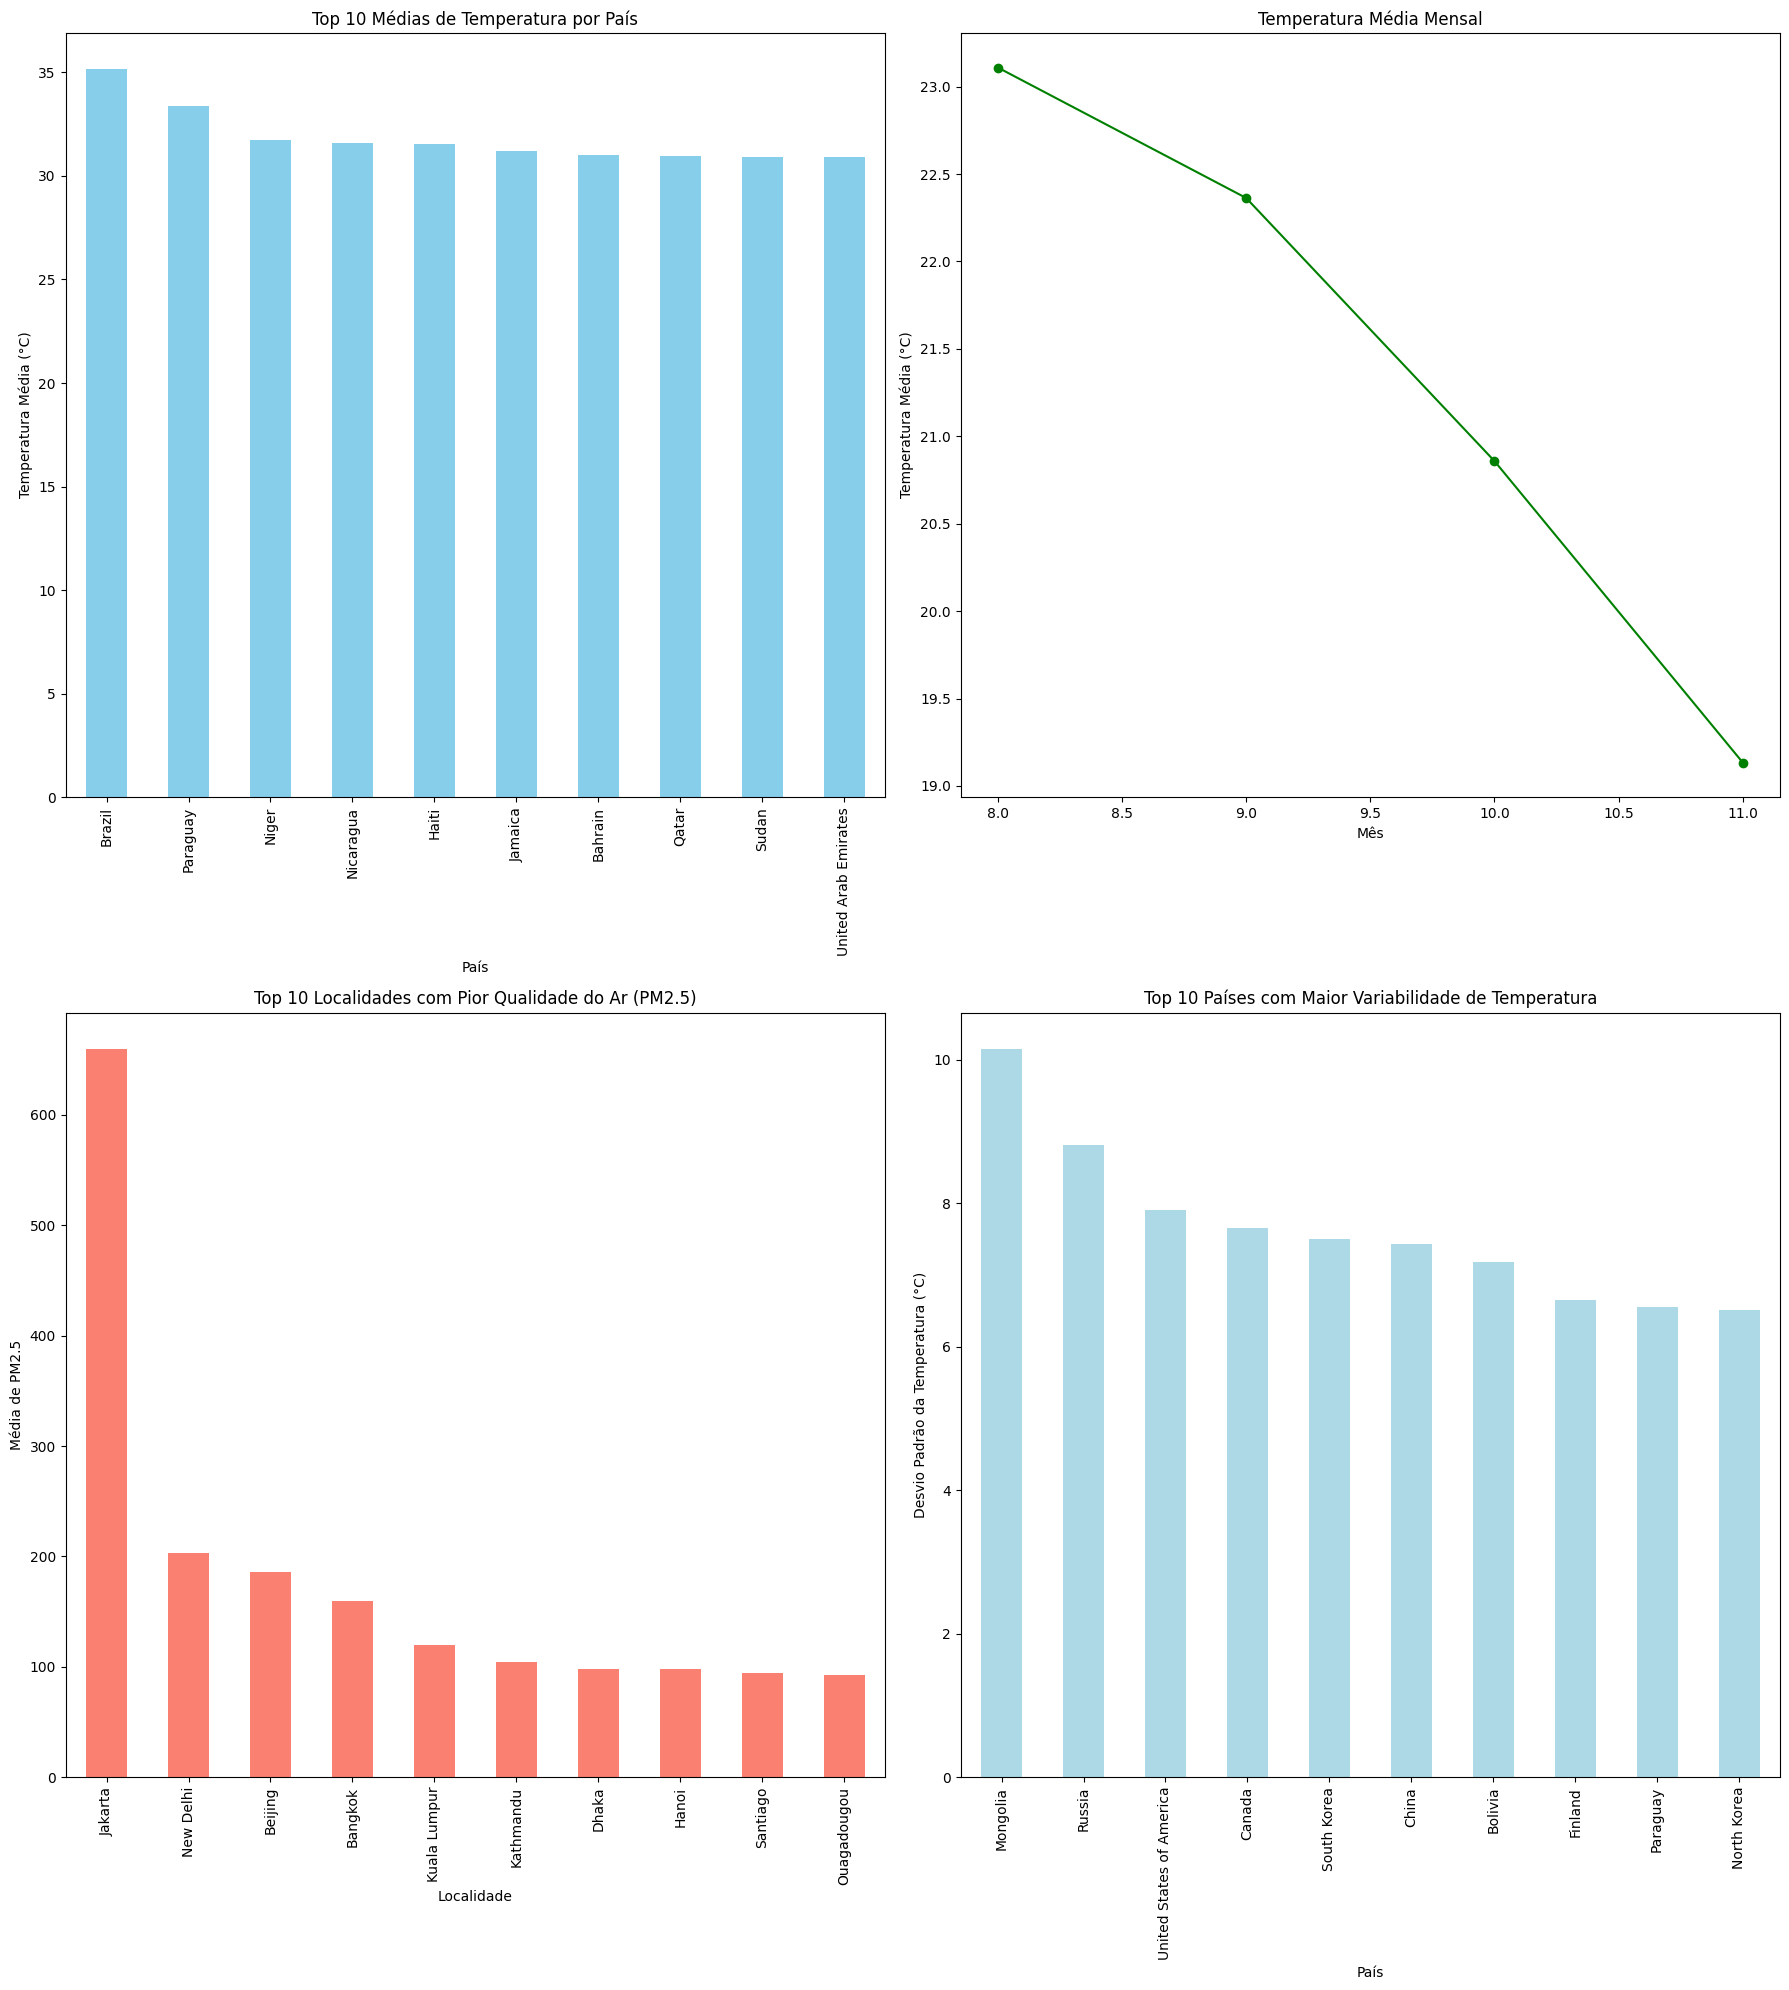

In [6]:
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(2, 2)


ax0 = plt.subplot(gs[0])
temp_pais.head(10).plot(kind='bar', color='skyblue', ax=ax0)
ax0.set_title('Top 10 Médias de Temperatura por País')
ax0.set_ylabel('Temperatura Média (°C)')
ax0.set_xlabel('País')

ax1 = plt.subplot(gs[1])
temp_mensal.plot(kind='line', marker='o', color='green', ax=ax1)
ax1.set_title('Temperatura Média Mensal')
ax1.set_ylabel('Temperatura Média (°C)')
ax1.set_xlabel('Mês')

ax2 = plt.subplot(gs[2])
qualidade_ar_localidade.head(10).plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Top 10 Localidades com Pior Qualidade do Ar (PM2.5)')
ax2.set_ylabel('Média de PM2.5')
ax2.set_xlabel('Localidade')


ax3 = plt.subplot(gs[3])
variabilidade_temp_pais.head(10).plot(kind='bar', color='lightblue', ax=ax3)
ax3.set_title('Top 10 Países com Maior Variabilidade de Temperatura')
ax3.set_ylabel('Desvio Padrão da Temperatura (°C)')
ax3.set_xlabel('País')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlação entre Temperatura e Qualidade do Ar (PM2.5)')

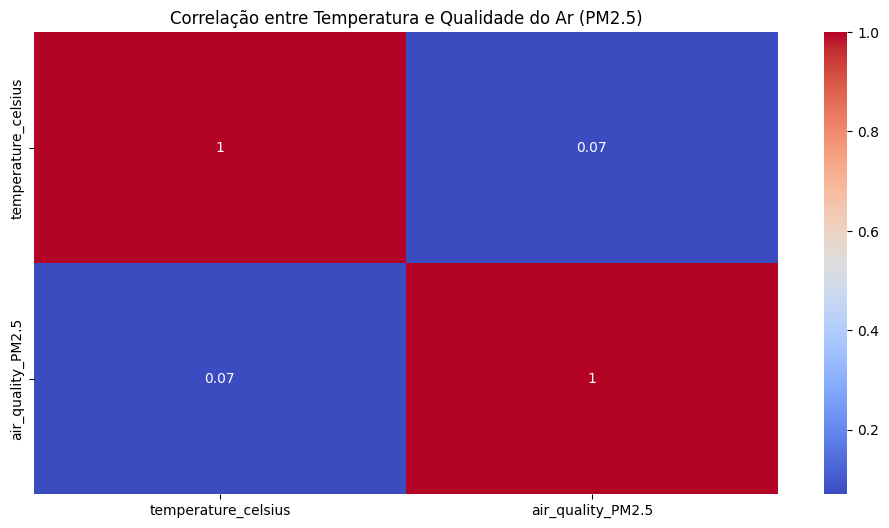

In [7]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 1)

ax0 = plt.subplot(gs[0])
sns.heatmap(correlacao_temp_qualidade_ar, annot=True, cmap='coolwarm', ax=ax0)
ax0.set_title('Correlação entre Temperatura e Qualidade do Ar (PM2.5)')

Text(0.5, 0, 'País')

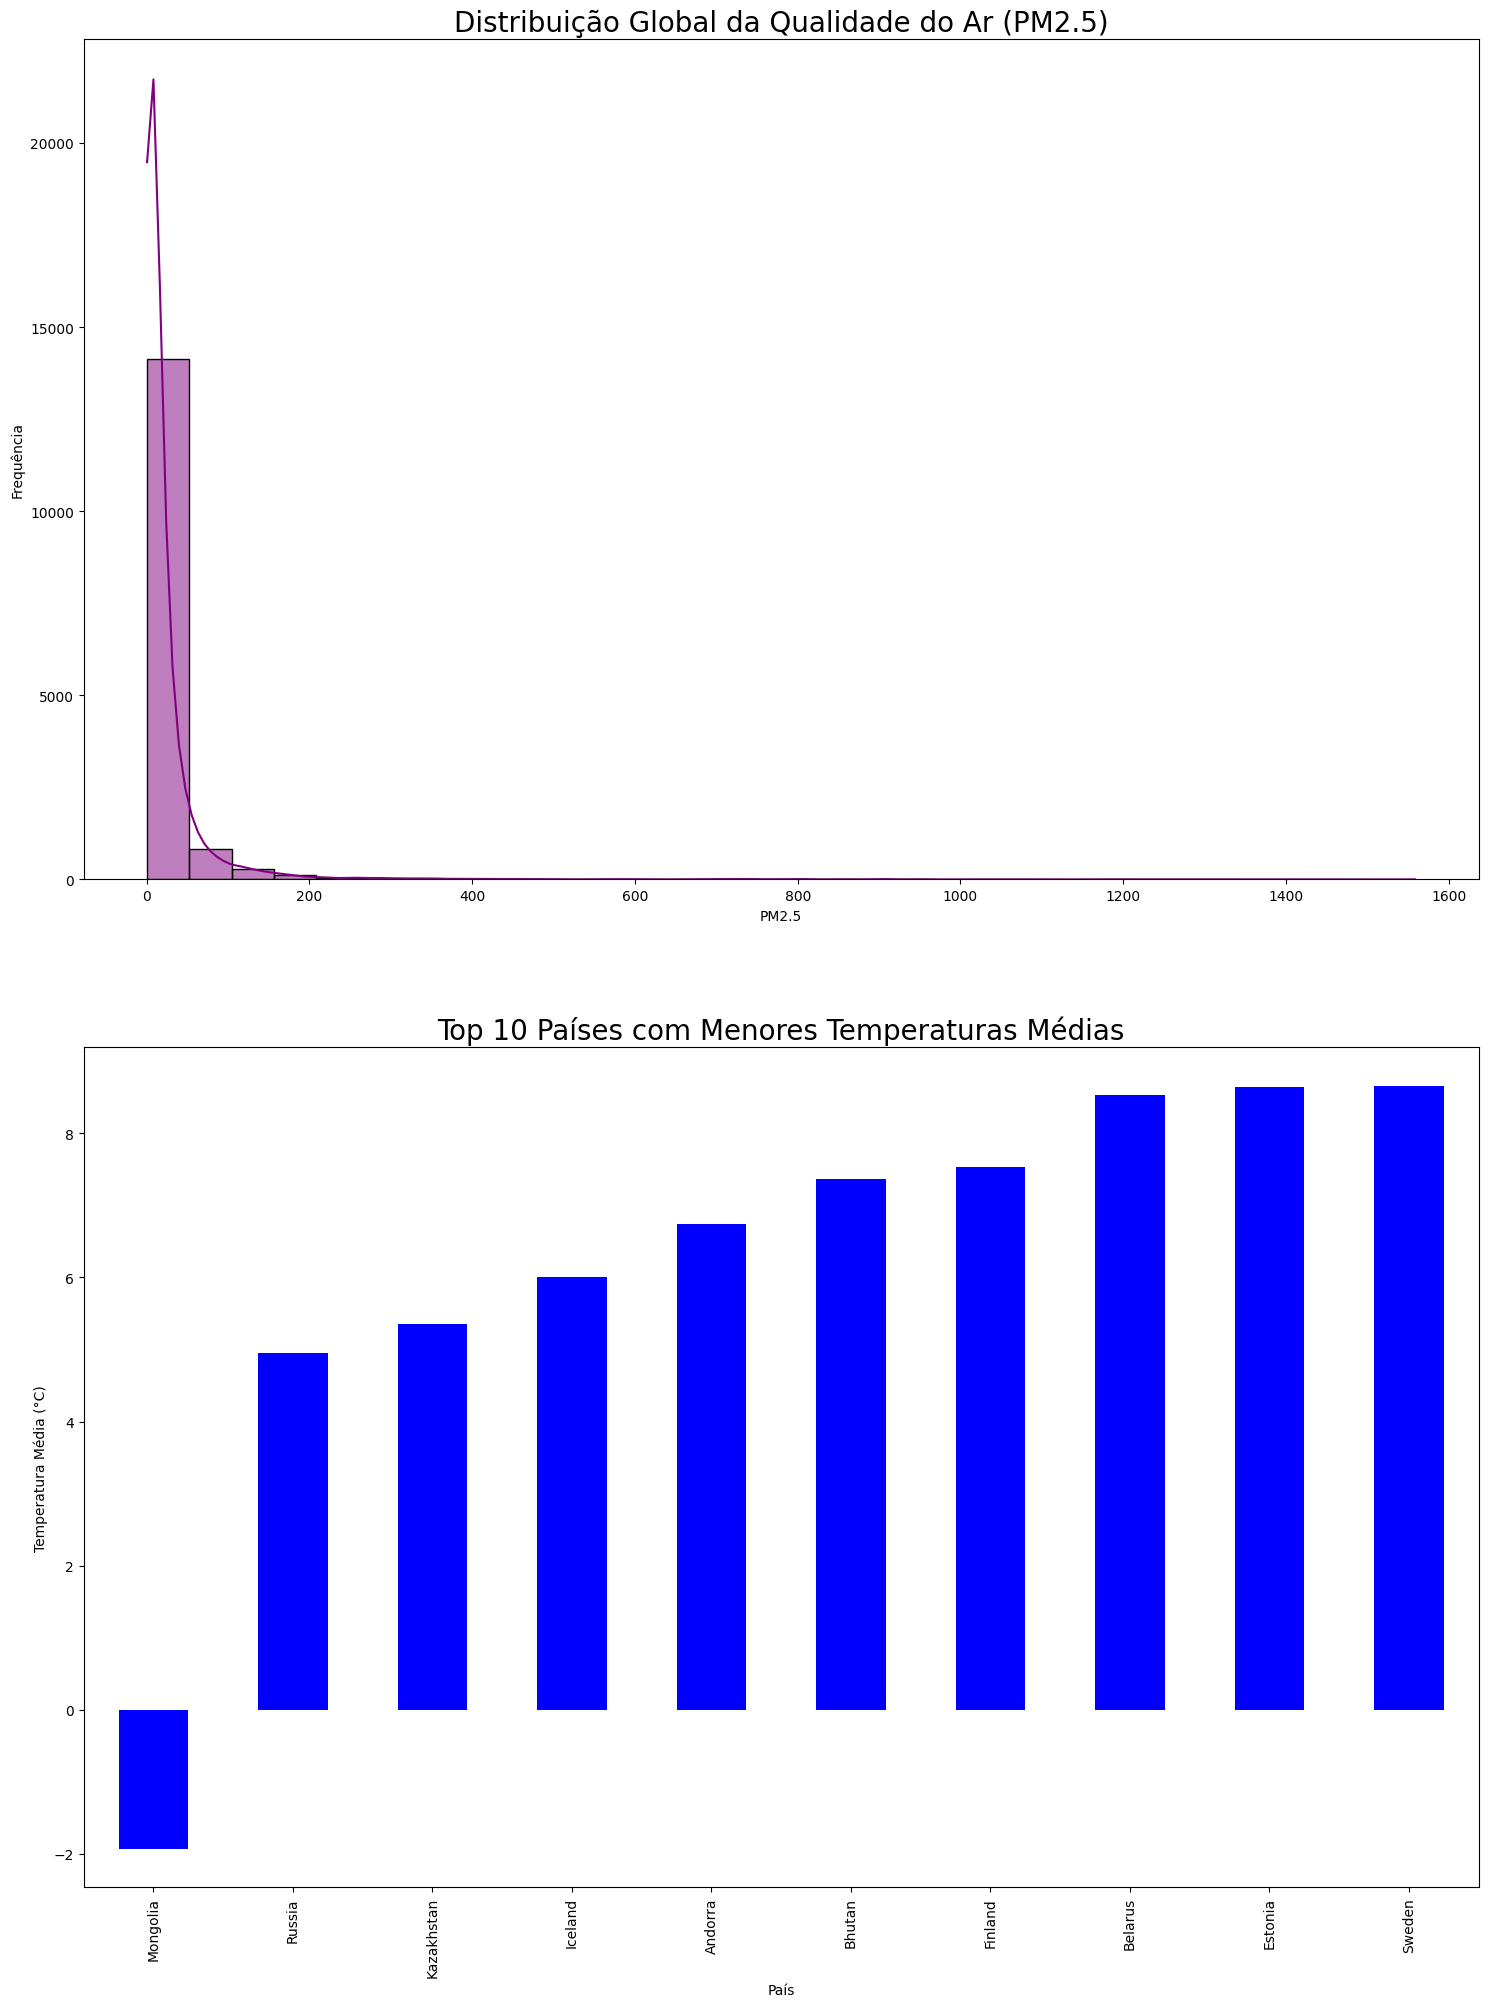

In [8]:
fig = plt.figure(figsize=(18, 24))
gs = gridspec.GridSpec(2, 1)

ax0 = plt.subplot(gs[0])
sns.histplot(distribuicao_qualidade_ar, bins=30, kde=True, color='purple', ax=ax0)
ax0.set_title('Distribuição Global da Qualidade do Ar (PM2.5)', fontdict={'fontsize': 20})
ax0.set_xlabel('PM2.5')
ax0.set_ylabel('Frequência')


ax1 = plt.subplot(gs[1])
pais_temp_menor.head(10).plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Top 10 Países com Menores Temperaturas Médias', fontdict={'fontsize': 20})
ax1.set_ylabel('Temperatura Média (°C)')
ax1.set_xlabel('País')


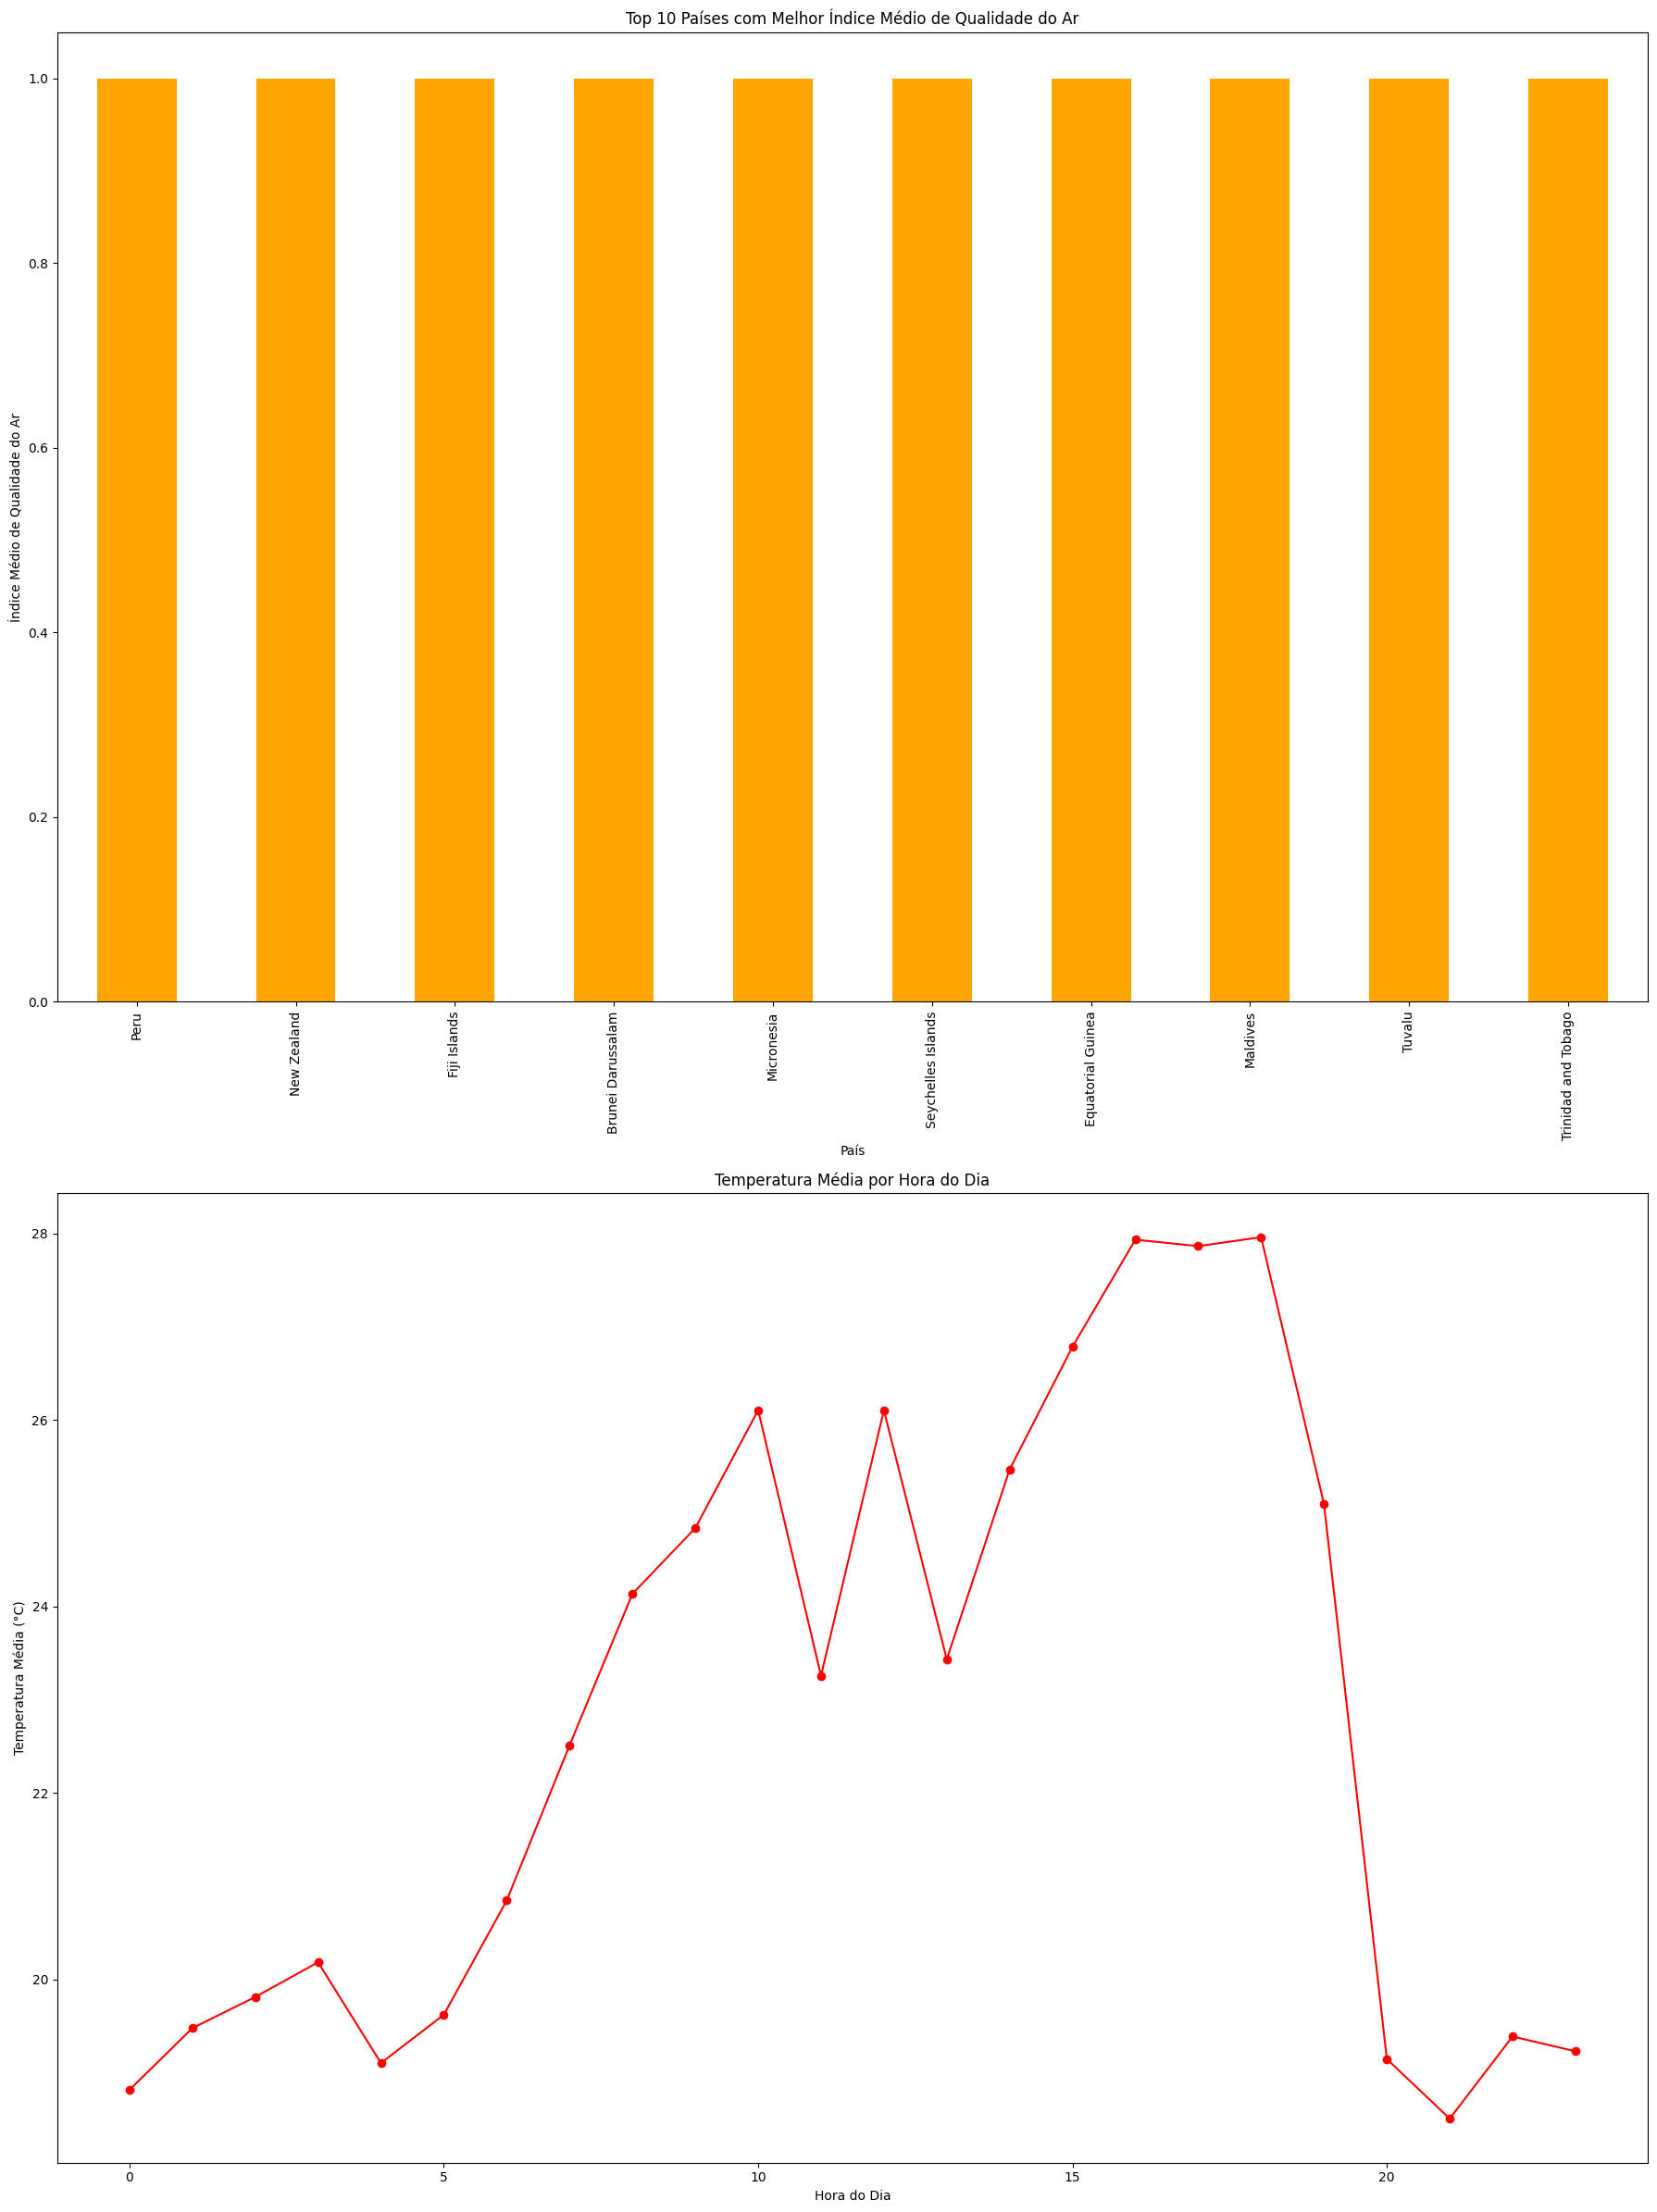

In [9]:
fig = plt.figure(figsize=(18, 24))
gs = gridspec.GridSpec(2, 1)

ax0 = plt.subplot(gs[0])
indice_qualidade_ar_pais.head(10).plot(kind='bar', color='orange', ax=ax0)
ax0.set_title('Top 10 Países com Melhor Índice Médio de Qualidade do Ar')
ax0.set_ylabel('Índice Médio de Qualidade do Ar')
ax0.set_xlabel('País')

ax1 = plt.subplot(gs[1])
temp_hora.plot(kind='line', marker='o', color='red', ax=ax1)
ax1.set_title('Temperatura Média por Hora do Dia')
ax1.set_ylabel('Temperatura Média (°C)')
ax1.set_xlabel('Hora do Dia')

plt.tight_layout()
plt.show()
